# Assignment: Pandas Fundamentals with Earthquake Data

Pandas tutorial from [Earth and Environmental Data Science](https://earth-env-data-science.github.io/assignments/basic_pandas.html)

All code wirtten by myself attemping to fulfill the requirements of the assignment. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1) Use Pandas' read_csv function directly on this URL to open it as a DataFrame

In [3]:
url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
df = pd.read_csv(url)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

In [4]:
url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
df = pd.read_csv(url)     #parse_dates = [1]


In [5]:
df['time'] = pd.to_datetime(df['time'])
df['updated'] = pd.to_datetime(df['updated'])
df = df.set_index('id')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  object             
 13  type       120108 non-null  object             
dtypes: datetime64[ns, UTC](1), d

3. Use describe to get the basic statistics of all the columns

In [7]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


4) Use nlargest to get the top 20 earthquakes by magnitude

In [8]:
df.nlargest(n = 20, columns = 'mag')

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223000+00:00,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699000+00:00,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755000+00:00,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398000+00:00,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633000+00:00,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13 19:29:13.018000+00:00,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13 19:35:02.679000+00:00,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13 19:30:39.599000+00:00,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01 02:37:56+00:00,"56km WSW of Panguna, Papua New Guinea",earthquake


5) Extract the state or country using Pandas text data functions

In [9]:
df['place'] = df['place'].astype("string")
df['country'] = df['place'].str.split(', ').str.get(1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  string             
 13  type       120108 non-null  object             
 14  country    116607 non-null  

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake,Mexico


6) Display each unique value from the new column

In [10]:
df['country'].unique()


array(['Alaska', 'Nevada', 'Mexico', 'California', 'Papua New Guinea',
       'New Zealand', 'Missouri', nan, 'Montana',
       'British Virgin Islands', 'Washington', 'Oregon', 'Canada', 'Fiji',
       'Antarctica', 'Chile', 'Utah', 'Indonesia', 'Solomon Islands',
       'Micronesia', 'Oklahoma', 'Hawaii', 'Wyoming', 'Russia', 'Arizona',
       'Philippines', 'Bolivia', 'Greece', 'Japan', 'Puerto Rico', 'Iran',
       'Tonga', 'Wallis and Futuna', 'Colorado', 'Guam', 'CA', 'Idaho',
       'Pakistan', 'Burma', 'China', 'Peru', 'Costa Rica', 'East Timor',
       'Japan region', 'Northern Mariana Islands', 'El Salvador', 'Samoa',
       'Taiwan', 'Arkansas', 'South Sandwich Islands', 'Colombia',
       'Dominican Republic', 'Argentina', 'Texas', 'New Hampshire',
       'Saint Helena', 'Tanzania', 'Vanuatu', 'Bosnia and Herzegovina',
       'India', 'American Samoa', 'Tennessee', 'Kentucky', 'Serbia',
       'Nicaragua', 'Republic of the Congo', 'U.S. Virgin Islands', '',
       'Guatemal

7) Create a filtered dataset tha only has earthquakes of magnitude 4 or larger

In [11]:
df2 = df[df['mag'] > 4]
df2.head()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16371 entries, usc000mqlp to usc000t6yn
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   time       16371 non-null  datetime64[ns]     
 1   latitude   16371 non-null  float64            
 2   longitude  16371 non-null  float64            
 3   depth      16371 non-null  float64            
 4   mag        16371 non-null  float64            
 5   magType    16371 non-null  object             
 6   nst        57 non-null     float64            
 7   gap        15004 non-null  float64            
 8   dmin       14965 non-null  float64            
 9   rms        16371 non-null  float64            
 10  net        16371 non-null  object             
 11  updated    16371 non-null  datetime64[ns, UTC]
 12  place      16371 non-null  string             
 13  type       16371 non-null  object             
 14  country    14526 non-null  object            

8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with most earthquakes

<AxesSubplot:>

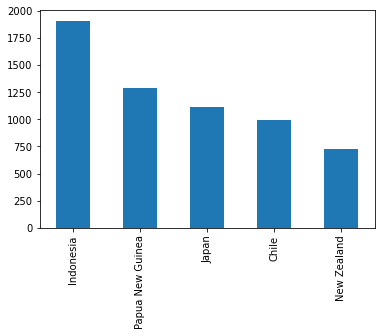

In [12]:
counts = df2['country'].value_counts()

df2['country'].value_counts().nlargest(n = 5).plot(kind = 'bar')


9) Make a histogram the distribution of the Earthquake magnitudes

<AxesSubplot:>

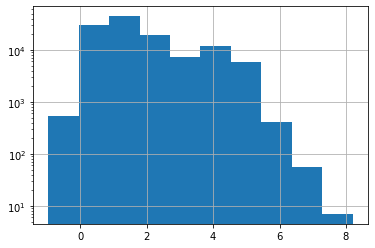

In [13]:
df['mag'].hist(log = True)

<AxesSubplot:>

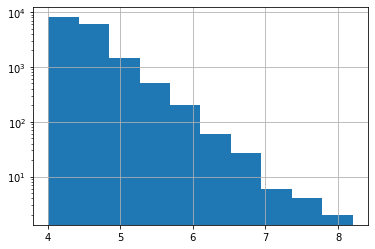

In [14]:
df2['mag'].hist(log = True)

10) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

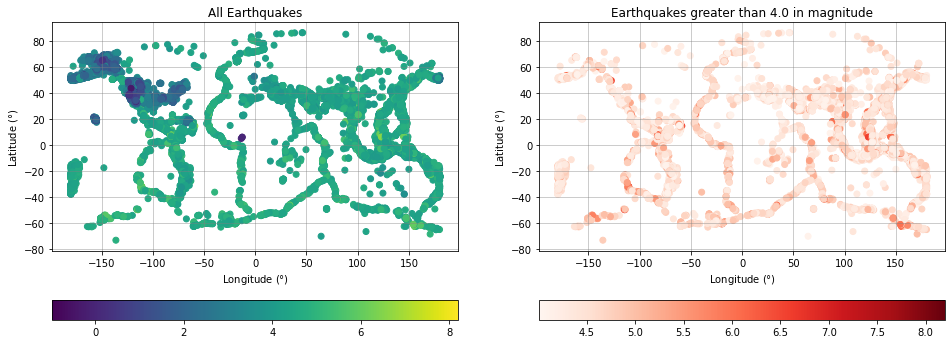

In [15]:
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize = (16, 6), ncols = 2)     
fig.patch.set_facecolor('white')

mappable = ax[0].scatter(df['longitude'], df['latitude'], c = df['mag'])
ax[0].set_ylabel('Latitude ($\degree$)')
ax[0].set_xlabel('Longitude ($\degree$)')
ax[0].grid(which = 'major', linestyle = '-', color = 'grey', alpha = 0.5)
ax[0].set_title('All Earthquakes')
cbar = plt.colorbar(mappable, ax = ax[0], location = 'bottom')

mappable2 = ax[1].scatter(df2['longitude'], df2['latitude'], c = df2['mag'], cmap = 'Reds')
ax[1].set_ylabel('Latitude ($\degree$)')
ax[1].set_xlabel('Longitude ($\degree$)')
ax[1].grid(which = 'major', linestyle = '-', color = 'grey', alpha = 0.5)
ax[1].set_title('Earthquakes greater than 4.0 in magnitude')
cbar = plt.colorbar(mappable2, ax = ax[1], location = 'bottom')

#ax[0].colorbar(sctr, location = 'right', label = 'Depth [m]')
#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), location = 'right')